In [10]:
from pyspark.sql import (
    functions as f,
    SparkSession,
    types as t
)
from pyspark.ml.regression import LinearRegression

# https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression
# https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_linear_regression_data.txt
spark = SparkSession.builder.appName("ml_lr").getOrCreate()

# LibSVM: <label> <index1>:<value1> <index2>:<value2> ... <indexN>:<valueN>
# -9.490009878824548 1:0.4551273600657362 2:0.36644694351969087 3:-0.38256108933468047 4:-0.4458430198517267 5:0.33109790358914726 6:0.8067445293443565 7:-0.2624341731773887 8:-0.44850386111659524 9:-0.07269284838169332 10:0.5658035575800715
df = spark.read.format("libsvm")\
    .load("file:///home/jovyan/work/sample/sample_linear_regression_data.txt")
df.show()

training, test = df.randomSplit([0.7, 0.3])
training.describe().show()
test.describe().show()

lr = LinearRegression(
    featuresCol='features',
    labelCol='label',
    predictionCol='prediction',
    maxIter=10,
    regParam=0.3,
    elasticNetParam=0.8
)

# Fit the model
lr_model = lr.fit(training)
test_result = lr_model.evaluate(test)

+-------------------+--------------------+
|              label|            features|
+-------------------+--------------------+
| -9.490009878824548|(10,[0,1,2,3,4,5,...|
| 0.2577820163584905|(10,[0,1,2,3,4,5,...|
| -4.438869807456516|(10,[0,1,2,3,4,5,...|
|-19.782762789614537|(10,[0,1,2,3,4,5,...|
| -7.966593841555266|(10,[0,1,2,3,4,5,...|
| -7.896274316726144|(10,[0,1,2,3,4,5,...|
| -8.464803554195287|(10,[0,1,2,3,4,5,...|
| 2.1214592666251364|(10,[0,1,2,3,4,5,...|
| 1.0720117616524107|(10,[0,1,2,3,4,5,...|
|-13.772441561702871|(10,[0,1,2,3,4,5,...|
| -5.082010756207233|(10,[0,1,2,3,4,5,...|
|  7.887786536531237|(10,[0,1,2,3,4,5,...|
| 14.323146365332388|(10,[0,1,2,3,4,5,...|
|-20.057482615789212|(10,[0,1,2,3,4,5,...|
|-0.8995693247765151|(10,[0,1,2,3,4,5,...|
| -19.16829262296376|(10,[0,1,2,3,4,5,...|
|  5.601801561245534|(10,[0,1,2,3,4,5,...|
|-3.2256352187273354|(10,[0,1,2,3,4,5,...|
| 1.5299675726687754|(10,[0,1,2,3,4,5,...|
| -0.250102447941961|(10,[0,1,2,3,4,5,...|
+----------

In [3]:
# residuals: The difference between an observed value of the response variable and the value of the response variable predicted from the regression line.
test_result.residuals.show()

+-------------------+
|          residuals|
+-------------------+
| -28.35178019806973|
|-26.724327572532868|
|-22.052043337374013|
| -19.01970536400181|
|-16.540642713027317|
|-17.575219484116676|
|-15.205126146370947|
|-19.045747520396134|
| -17.08017269380867|
| -16.20512265300275|
|-15.134898322075122|
| -17.99377359080688|
|-17.743113689688524|
|-15.940792779869867|
| -17.42450921824872|
| -12.77033288173437|
|-12.954555116959162|
|-13.902642113686968|
|-13.094625682162738|
|-14.733301065833736|
+-------------------+
only showing top 20 rows



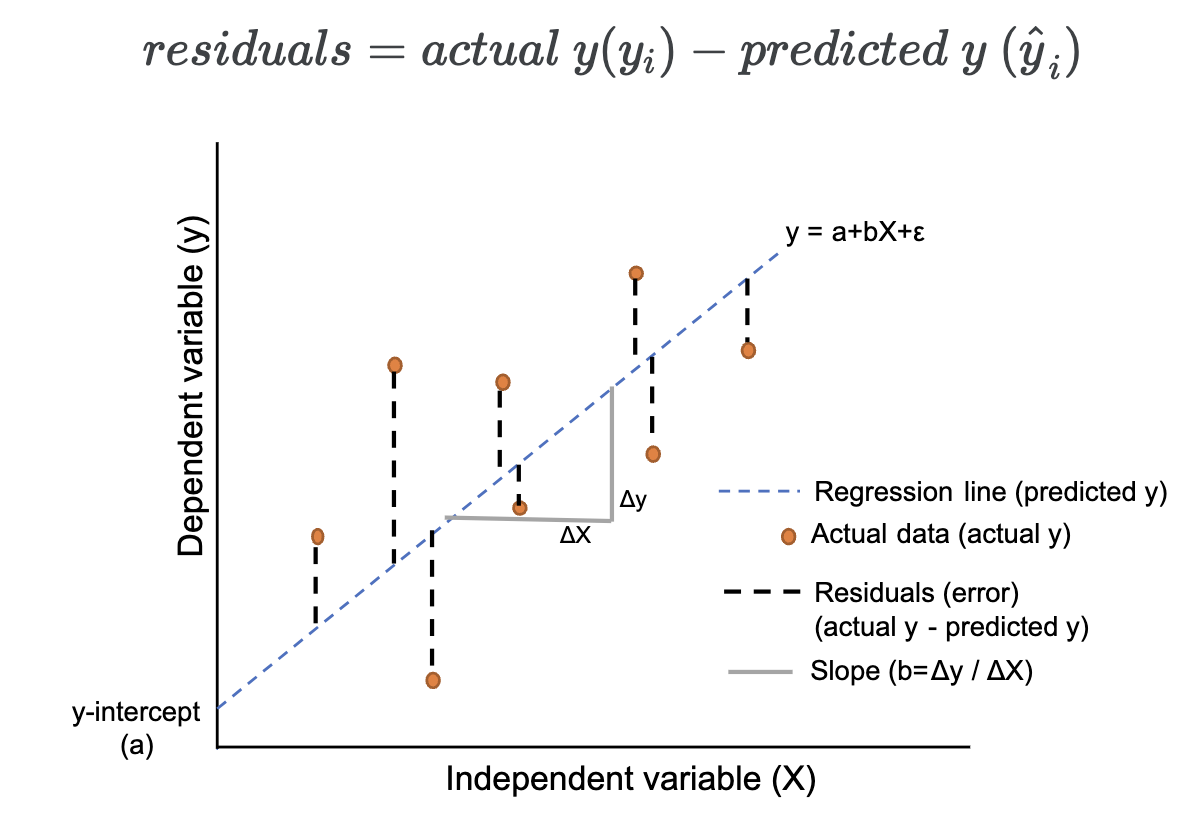

In [11]:

# # Feature's coefficients
print(f"coefficients: {lr_model.coefficients}\n")

print(f"intercept: {lr_model.intercept}\n")

training_summary = lr_model.summary

# Error metrics
# Mean Absolute Error: a measure of errors between paired observations expressing the same phenomenon
print(f"MAE: {training_summary.meanAbsoluteError}")


coefficients: [-0.22031855425671998,0.6081936462209909,-0.32383884447408806,2.1799787615045463,0.0,0.8864896860094104,-0.09766592105344724,-0.07179378880562408,0.0,0.4002665975304491]

intercept: 0.5387601647648039

MAE: 8.004909944814376


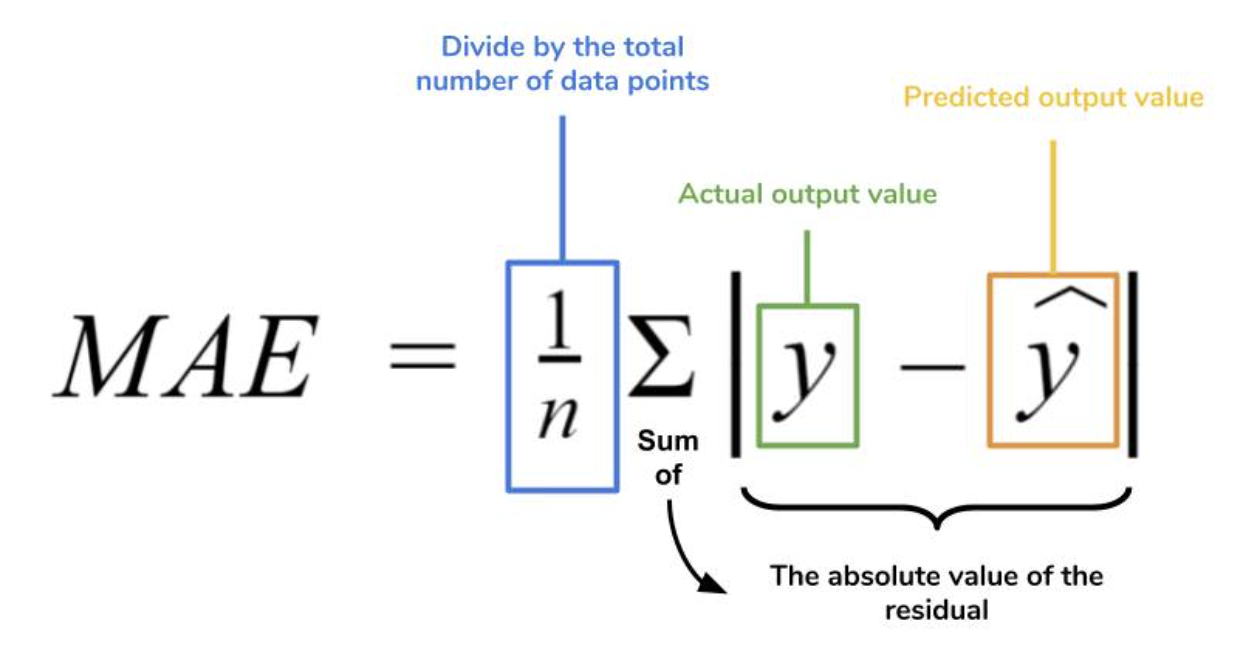

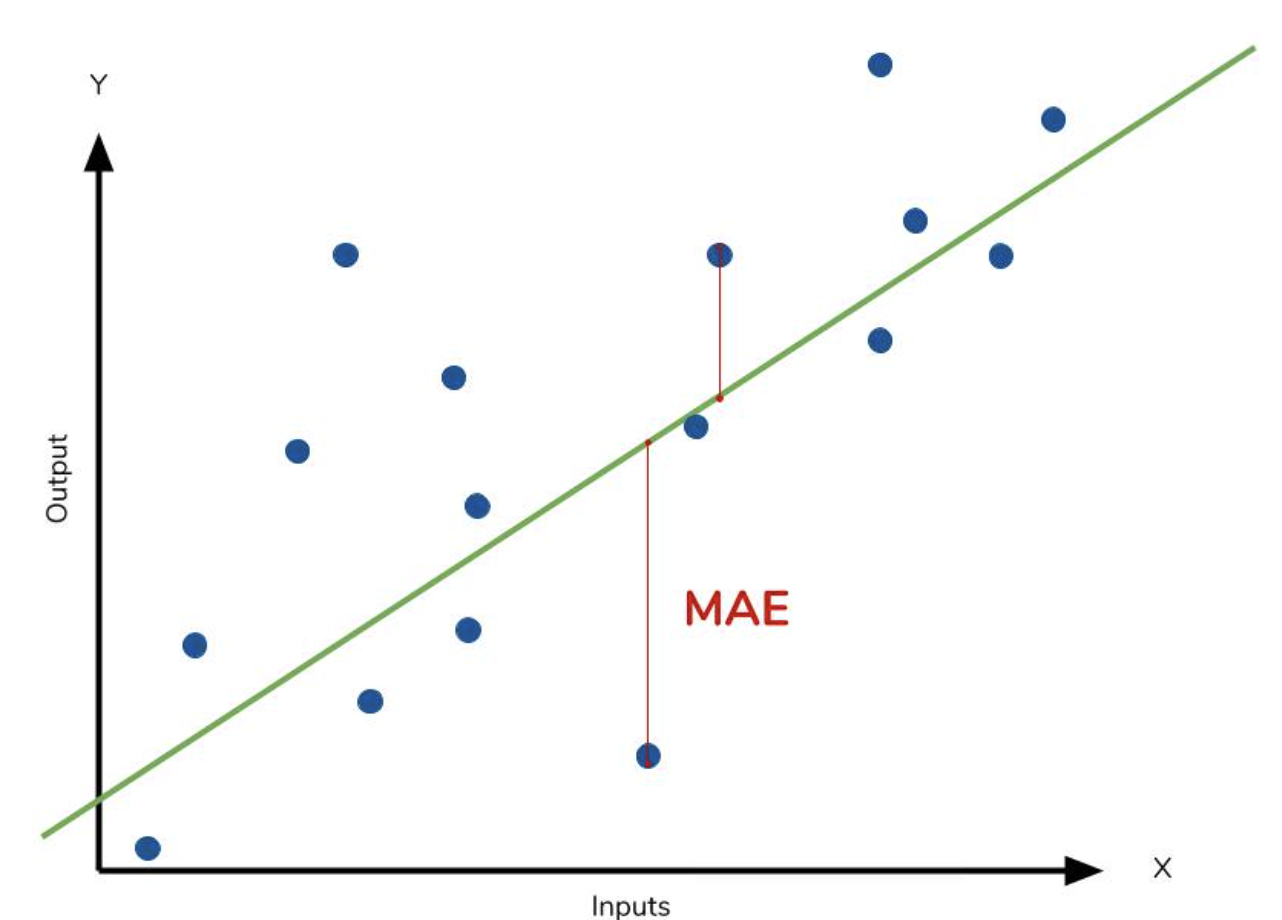

In [5]:

# Mean Squared Error(MSE): the mean pf the squared errors, The diff noted more than MAE
# This is more popular, pitfall is the unit is also squared
print(f"MSE: {training_summary.meanSquaredError}")

MSE: 100.64294008730822


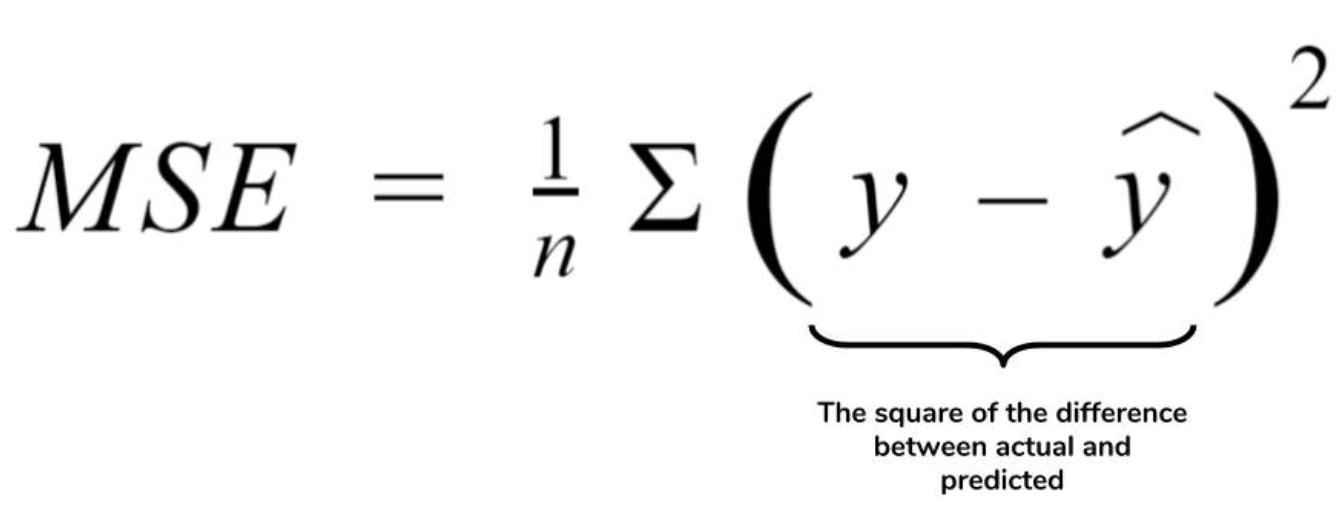

In [6]:
# Root Mean Squared Error(RMSE): The root of the mean of the squared errors
# Most pupular & the same unit
print(f"RMSE: {training_summary.rootMeanSquaredError}")


RMSE: 10.032095498314806


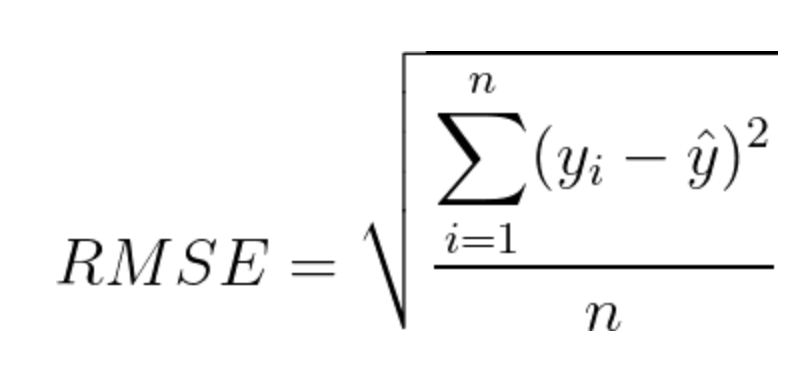

In [12]:
# Statistical measure
# R-squared (R2), AKA coefficient of determination: How much variance your model accounts for
# 0 - 1(0% to 100%)
# the higher the R-squared, the better the model fits your data
print(f"r2: {training_summary.r2}")

r2: 0.029753312738765914


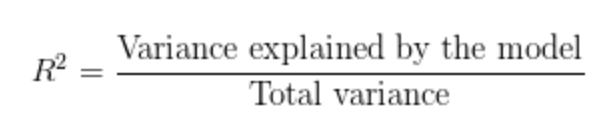

In [ ]:
# 0% represents a model that does not explain any of the variations in the response variable around its mean.
# 100% represents a model that explains all of the variations in the response variable around its mean.

In [8]:
predictions = lr_model.transform(test)
predictions.show()

+-------------------+--------------------+--------------------+
|              label|            features|          prediction|
+-------------------+--------------------+--------------------+
|-28.571478869743427|(10,[0,1,2,3,4,5,...|-0.21969867167369794|
|-22.949825936196074|(10,[0,1,2,3,4,5,...|   3.774501636336794|
|-21.432387764165806|(10,[0,1,2,3,4,5,...|  0.6196555732082052|
| -18.27521356600463|(10,[0,1,2,3,4,5,...|  0.7444917979971792|
|-17.026492264209548|(10,[0,1,2,3,4,5,...|-0.48584955118223094|
|-16.151349351277112|(10,[0,1,2,3,4,5,...|  1.4238701328395655|
|-15.951512565794573|(10,[0,1,2,3,4,5,...| -0.7463864194236256|
|-15.780685032623301|(10,[0,1,2,3,4,5,...|  3.2650624877728305|
|-15.732088272239245|(10,[0,1,2,3,4,5,...|   1.348084421569424|
|-15.437384793431217|(10,[0,1,2,3,4,5,...|  0.7677378595715335|
|-15.375857723312297|(10,[0,1,2,3,4,5,...|-0.24095940123717596|
|-15.359544879832677|(10,[0,1,2,3,4,5,...|  2.6342287109742024|
|-15.334767479922341|(10,[0,1,2,3,4,5,..